In [29]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import get_data
from sklearn.linear_model import LinearRegression

In [5]:
engine = get_data.engine

In [98]:
df = pd.read_sql_query('SELECT datadate, gvkey, cusip, niq, atq, prccq FROM Quarterly', engine)
df.tail()
# NIQ = Net Income (Loss)
# ACTQ = Current Assets - Total
# ATQ = Assets - Total
# PRCCQ = Price Close - Quarter

,datadate,gvkey,cusip,niq,atq,prccq
194942,2012-06-30,028967,74727A104,3.072,2043.426,13.1000
194943,2012-09-30,028967,74727A104,3.057,2023.946,14.9800
194944,2012-12-31,028967,74727A104,3.252,2093.730,13.2242
194945,2013-03-31,028967,74727A104,3.265,2143.991,16.5000
194946,2001-12-31,029359,866674104,6.609,994.449,37.2500


In [99]:
len(df)

194947

In [100]:
df = df.dropna()
len(df)

179556

<Axes: ylabel='Frequency'>

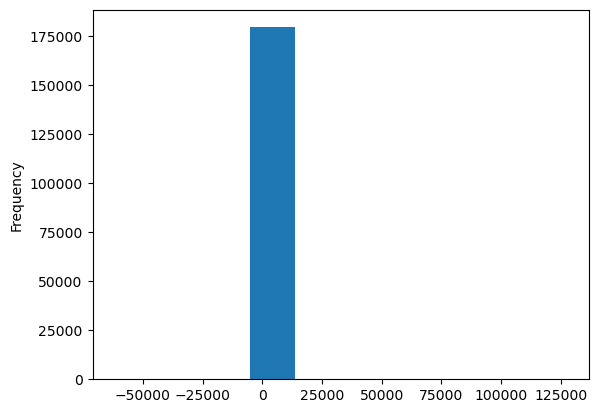

In [101]:
df['niq'].plot(kind='hist')

In [102]:
df.query('niq == 0')

,datadate,gvkey,cusip,niq,atq,prccq
4048,2021-09-30,036973,69526K105,0.0,7007.000,12.520
4532,2021-06-30,037811,82671G100,0.0,2092.000,30.430
11426,2003-09-30,122902,64115T104,0.0,133.698,4.760
14773,2016-03-31,158737,78469C103,0.0,796.300,24.060
16666,2020-03-31,178703,74731Q103,0.0,131.457,4.460
18150,2021-01-31,185952,749527107,0.0,1259.100,10.330
18153,2021-10-31,185952,749527107,0.0,1238.300,15.110
21741,2023-09-30,010411,879433829,0.0,14414.000,18.310
24215,2021-09-30,010999,913259107,0.0,1509.000,42.780
25858,2017-12-31,011376,955306105,0.0,1862.800,98.670


In [103]:
len(df.query('niq == 0'))

52

In [104]:
df = df[df['niq'] != 0]
len(df)

179504

In [105]:
df['roa'] = df['niq'] / df['atq']
df.tail()

,datadate,gvkey,cusip,niq,atq,prccq,roa
194942,2012-06-30,028967,74727A104,3.072,2043.426,13.1000,0.001503
194943,2012-09-30,028967,74727A104,3.057,2023.946,14.9800,0.001510
194944,2012-12-31,028967,74727A104,3.252,2093.730,13.2242,0.001553
194945,2013-03-31,028967,74727A104,3.265,2143.991,16.5000,0.001523
194946,2001-12-31,029359,866674104,6.609,994.449,37.2500,0.006646


In [106]:
df = df[df['roa'] < np.finfo(np.float64).max]
df = df[df['roa'] > np.finfo(np.float64).min]
len(df)

179491

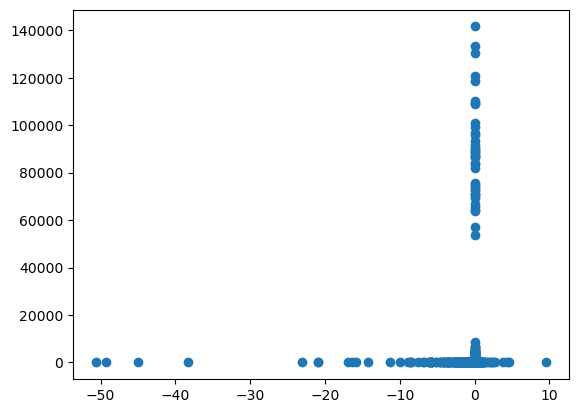

In [107]:
X = np.array(df['roa']).reshape(-1, 1)
Y = np.array(df['prccq'])
plt.scatter(X, Y)